# Assignment 4 - Dummy variables, more linear regressionm, and logistic regression

This assignment uses a data set with building information about sales in New York City over a 12 month period.  The data is originally from Kaggle [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and can be downloaded directly [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv).

In this dataset, the missing values are indicated by " -  " (a space, a dash, two spaces).  Recall from MAT 128 that we can tell Python these are missing values (NaN) by adding the parameter `na_values = [" -  "]` to the `read_csv()` function.

1. Filter the dataset so that the remaining rows:
    - have no NaN values; use df_new = df.dropna() or df = df.dropna()
    - have sales prices between \\$20,000 and \\$2,000,000
       less than \\$20,000 or more than \\$2,000,000
    - have only the neighborhoods Flushing-North, Sheepshead Bay, or Flatbush-East
    - have Gross Square Feet greater than 0 and less than 6,000
       
2. Create one scatter plot with the points colored by neighborhood.  What do you notice about the plot?

3. Create dummy variables for the neighborhood column, and create a linear model (see note below) using the two neighborhood dummy variables and the gross square feet as the independent variables.  
    - What is the equation for the regression line?  
    - What equation is used to make a prediction when the neighborhood is Flushing-North?  Flatbush-East?  Sheepshead Bay?  
    Note: Since the column names have spaces, you will need to surround them with Q('column_name') in the Statsmodel formula.  For example if the independent variable column names are "Ind Var" and "Ind Var 2", and the dependent variable column name is "Dep Var" in the dataframe df, then the code to fit the linear model is:
`lm = smf.ols("Q('Dep Var') ~ Q('Ind Var') + Q('Ind Var 2')", data = df).fit()`

4. Assess the fit of your linear model from Question 3 by:
    - finding the p-value for the intercept and coefficients
    - finding R-squared 
    - computing the mean squared error
    - plotting the residuals
    - plotting the sale price on the x axis and the residuals on the y axis
    Based on the above information, how good of fit is your model?  Are there any problems with it?
    
5. In Question 3 you wrote 3 linear equations for predicting the sale price if a building was in Flatbush-East, Flushing-North, or Sheepshead Bay.  Plot lines given by the 3 equations on a scatterplot of gross square feet (x) vs. sale price.  What does the plot tell you about real estate in Flatbush-East, Flushing-North, and Sheepshead Bay?    Hint:  See first half of Lab 8. 

6. Fit a logistic regression model to predict when a sale is in Flushing-North using only sale price.  What is the equation of your model?  Plot the function on a scatter plot of sale price (x) vs. your dummy variable for Flushing-North (y).

7. Compute the sensitivity, specificity, precision, and accuracy for your logistic model, using a sale being in Flushing-North as positive.  Is your model better at correctly predicting a sale took place in Flushing-North or in Flatbush-East and Sheepshead Bay?  Of the sales predicted to be in Flushing-North, what proportion were really in Flushing-North?

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline

1)

In [3]:
rolling = pd.read_csv("rolling.csv", na_values = [" -  "])
rolling.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [5]:
rolling = rolling.dropna()
price_filter = (rolling["SALE PRICE"] >= 20000) & (rolling["SALE PRICE"] <= 2000000)
rolling = rolling[price_filter]

In [9]:
np.unique(rolling["NEIGHBORHOOD"])
neighborhood_filter = (rolling["NEIGHBORHOOD"] == "FLUSHING-NORTH") | (rolling["NEIGHBORHOOD"] == "SHEEPSHEAD BAY") | (rolling["NEIGHBORHOOD"] == "FLATBUSH-EAST")
rolling = rolling[neighborhood_filter]

In [10]:
square_feet_filter = (rolling["GROSS SQUARE FEET"] > 0) & (rolling["GROSS SQUARE FEET"] < 6000)
rolling = rolling[square_feet_filter]

2) It seems that neighborhood has a significant effect on the interactions between gross square feet and sales price.

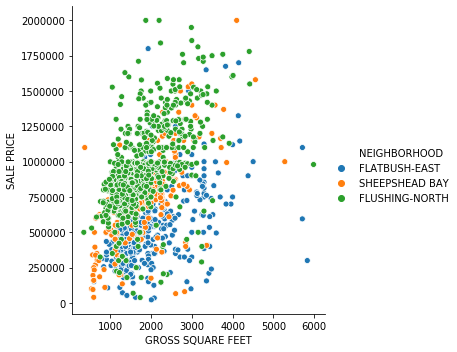

In [13]:
sns.relplot(x = "GROSS SQUARE FEET", y = "SALE PRICE", hue = "NEIGHBORHOOD", data = rolling)

3)

In [14]:
rolling = pd.get_dummies(rolling, columns = ["NEIGHBORHOOD"], drop_first = True)

In [16]:
rolling.head()

,Unnamed: 0,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NEIGHBORHOOD_FLUSHING-NORTH,NEIGHBORHOOD_SHEEPSHEAD BAY
37716,12365,3,01 ONE FAMILY DWELLINGS,1,4681,61,,A9,195 EAST 55TH STREET,,...,1,1875.0,1344.0,1910,1,A9,215000.0,2016-09-15 00:00:00,0,0
37720,12369,3,01 ONE FAMILY DWELLINGS,1,4695,27,,A9,466 EAST 48TH STREET,,...,1,3000.0,1240.0,1910,1,A9,422500.0,2017-07-10 00:00:00,0,0
37721,12370,3,01 ONE FAMILY DWELLINGS,1,4695,48,,A9,923 SCHENECTADY AVENUE,,...,1,2000.0,1300.0,1920,1,A9,355500.0,2016-10-13 00:00:00,0,0
37725,12374,3,01 ONE FAMILY DWELLINGS,1,4719,31,,A1,546 EAST 48TH STREET,,...,1,2500.0,1036.0,1915,1,A1,485000.0,2017-03-27 00:00:00,0,0
37726,12375,3,01 ONE FAMILY DWELLINGS,1,4719,61,,A9,987 SCHENECTADY AVENUE,,...,1,2000.0,1536.0,1910,1,A9,180000.0,2017-05-05 00:00:00,0,0


In [57]:
rolling.rename(index = {"NEIGHBORHOOD_SHEEPSHEAD BAY": "sheepshead", 
                     "NEIGHBORHOOD_FLUSHING-NORTH":"flushing",
                       "GROSS SQUARE FEET": "sqft",
                       "SALE PRICE": "price"}, 
                                 inplace = True) 
rolling.head()

,Unnamed: 0,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NEIGHBORHOOD_FLUSHING-NORTH,NEIGHBORHOOD_SHEEPSHEAD BAY
37716,12365,3,01 ONE FAMILY DWELLINGS,1,4681,61,,A9,195 EAST 55TH STREET,,...,1,1875.0,1344.0,1910,1,A9,215000.0,2016-09-15 00:00:00,0,0
37720,12369,3,01 ONE FAMILY DWELLINGS,1,4695,27,,A9,466 EAST 48TH STREET,,...,1,3000.0,1240.0,1910,1,A9,422500.0,2017-07-10 00:00:00,0,0
37721,12370,3,01 ONE FAMILY DWELLINGS,1,4695,48,,A9,923 SCHENECTADY AVENUE,,...,1,2000.0,1300.0,1920,1,A9,355500.0,2016-10-13 00:00:00,0,0
37725,12374,3,01 ONE FAMILY DWELLINGS,1,4719,31,,A1,546 EAST 48TH STREET,,...,1,2500.0,1036.0,1915,1,A1,485000.0,2017-03-27 00:00:00,0,0
37726,12375,3,01 ONE FAMILY DWELLINGS,1,4719,61,,A9,987 SCHENECTADY AVENUE,,...,1,2000.0,1536.0,1910,1,A9,180000.0,2017-05-05 00:00:00,0,0


In [48]:
model = smf.ols("price ~ sqft + sheepshead + flushing", data = rolling).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          2.03e-193
Time:                        02:46:43   Log-Likelihood:                -19777.
No. Observations:                1432   AIC:                         3.956e+04
Df Residuals:                    1428   BIC:                         3.958e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.756e+05   2.04e+04      8.623      0.000    1.36e+05    2.16e+05
sqft         202.6754      8.887     22.806      0.000     185.243     220.108
sheepshead  2.077e+05    1.9e+04     10.903      0.000     1.7e+05    2.45e+05
flushing    4.123e+05   1.45e+04     28.421      0.000    3.84e+05    4.41e+05
==============================================================================
Omnibus:                      101.289   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.821
Skew:                          -0.089   Prob(JB):                    3.51e-103
Kurtosis:                       5.806   Cond. No.                     7.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Equation:__ 1.756e+05 + 202.6754 * sqft + 2.077e+05 * sheepshead + 4.123e+05 * flushing 

__Flushing-North:__ 1.756e+05 + 202.6754 * sqft + 4.123e+05 

__Flatbush-East:__ 1.756e+05 + 202.6754 * sqft 

__Sheepshead Bay:__ 1.756e+05 + 202.6754 * sqft + 2.077e+05 

4) 

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          2.03e-193
Time:                        12:12:52   Log-Likelihood:                -19777.
No. Observations:                1432   AIC:                         3.956e+04
Df Residuals:                    1428   BIC:                         3.958e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.756e+05   2.04e+04      8.623      0.000    1.36e+05    2.16e+05
sqft         202.6754      8.887     22.806      0.000     185.243     220.108
sheepshead  2.077e+05    1.9e+04     10.903      0.000     1.7e+05    2.45e+05
flushing    4.123e+05   1.45e+04     28.421      0.000    3.84e+05    4.41e+05
==============================================================================
Omnibus:                      101.289   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.821
Skew:                          -0.089   Prob(JB):                    3.51e-103
Kurtosis:                       5.806   Cond. No.                     7.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# all the p-values for my intercept and coefficients are 0

In [49]:
model.rsquared

0.46508833813997175

In [62]:
mse = ((rolling["SALE PRICE"] - model.fittedvalues)**2).mean()
mse

58034875890.03043

In [87]:
rmse = math.sqrt(mse)
rmse

240904.28781993574

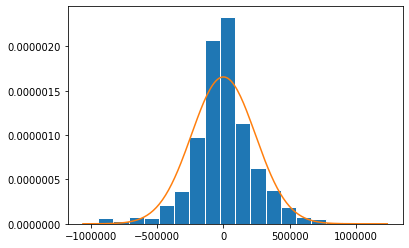

In [76]:
plt.hist(model.resid, edgecolor = 'w', bins = 20, density = True)
x = np.linspace(np.min(model.resid), np.max(model.resid), 200)
y = stats.norm.pdf(x, np.mean(model.resid), np.std(model.resid))
plt.plot(x, y)

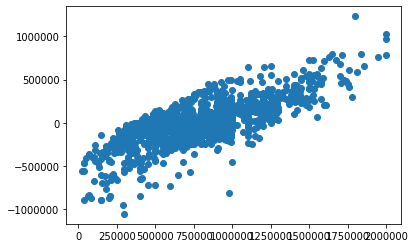

In [82]:
plt.scatter(rolling["SALE PRICE"], model.resid)

__CONCLUSION:__ Due to the unimpressive R-Squared and the plot of the residuals not really being centered at zero, my model is not that good of a fit of the data. Despite this, all the coefficients and the intercept have low p-values and the residuals are normally distributed.

5)

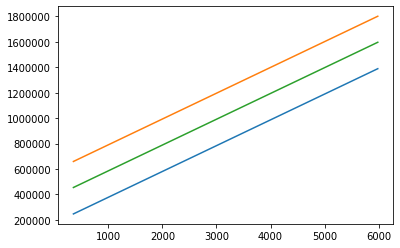

In [98]:
x = np.linspace(rolling["GROSS SQUARE FEET"].min(),rolling["GROSS SQUARE FEET"].max(), 2000)
flatbushy = 1.756e05 + (202.6754 * x)
flushingy = 1.756e05 + (202.6754 * x) + 4.123e05
sheepsheady = 1.756e05 + (202.6754 * x) + 2.077e05

plt.plot(x, flatbushy) # blue
plt.plot(x, flushingy) # orange
plt.plot(x, sheepsheady) # green

__CONCLUSION:__ The plot tells us that sales tend to be the highest in Flushing-North and that sales tend to be the lowest in Flatbush-East.

6) 

In [99]:
rolling.head()

,Unnamed: 0,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NEIGHBORHOOD_FLUSHING-NORTH,NEIGHBORHOOD_SHEEPSHEAD BAY
37716,12365,3,01 ONE FAMILY DWELLINGS,1,4681,61,,A9,195 EAST 55TH STREET,,...,1,1875.0,1344.0,1910,1,A9,215000.0,2016-09-15 00:00:00,0,0
37720,12369,3,01 ONE FAMILY DWELLINGS,1,4695,27,,A9,466 EAST 48TH STREET,,...,1,3000.0,1240.0,1910,1,A9,422500.0,2017-07-10 00:00:00,0,0
37721,12370,3,01 ONE FAMILY DWELLINGS,1,4695,48,,A9,923 SCHENECTADY AVENUE,,...,1,2000.0,1300.0,1920,1,A9,355500.0,2016-10-13 00:00:00,0,0
37725,12374,3,01 ONE FAMILY DWELLINGS,1,4719,31,,A1,546 EAST 48TH STREET,,...,1,2500.0,1036.0,1915,1,A1,485000.0,2017-03-27 00:00:00,0,0
37726,12375,3,01 ONE FAMILY DWELLINGS,1,4719,61,,A9,987 SCHENECTADY AVENUE,,...,1,2000.0,1536.0,1910,1,A9,180000.0,2017-05-05 00:00:00,0,0


In [102]:
model2 = smf.logit('Q("NEIGHBORHOOD_FLUSHING-NORTH") ~ Q("SALE PRICE")', data = rolling).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.559640
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     Q("NEIGHBORHOOD_FLUSHING-NORTH")   No. Observations:                 1432
Model:                                        Logit   Df Residuals:                     1430
Method:                                         MLE   Df Model:                            1
Date:                              Wed, 16 Oct 2019   Pseudo R-squ.:                  0.1922
Time:                                      12:27:27   Log-Likelihood:                -801.41
converged:                                     True   LL-Null:                       -992.13
Covariance Type:                          nonrobust   LLR p-value:                 5.991e-85
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.0876      0.205    -15.027      0.000      -3.490      -2.685
Q("SALE PRICE")  4.007e-06   2.53e-07     15.844      0.000    3.51e-06     4.5e-06
===================================================================================
"""

__EQUATION:__ 1 / (1 + e^-(-3.0876 + 4.007e-06 * sales_price))

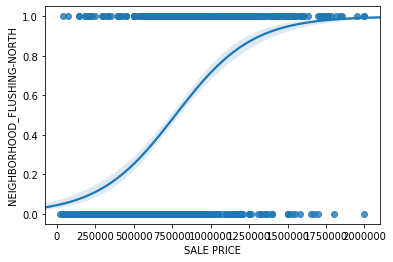

In [104]:
sns.regplot(x = "SALE PRICE", y = "NEIGHBORHOOD_FLUSHING-NORTH", data = rolling, fit_reg = True, logistic = True)

7) Compute the sensitivity, specificity, precision, and accuracy for your logistic model, using a sale being in Flushing-North as positive.  Is your model better at correctly predicting a sale took place in Flushing-North or in Flatbush-East and Sheepshead Bay?  Of the sales predicted to be in Flushing-North, what proportion were really in Flushing-North?

In [109]:
table = model2.pred_table()
table

# since its the confusion matrix from statsmodels.formula.api
#           predicted
#            1    0
# actual 1
#        0

array([[489., 209.],
       [164., 570.]])

In [128]:
tp = table[0][0]
tn = table[1][1]
fp = table[1][0]
fn = table[0][1]

In [129]:
# sensitivity = TP / (TP + FN)
sens = tp / (tp + fn)
sens

0.7005730659025788

In [130]:
# specificity = TN / (TN + FP)
spec = tn / (tn + fp)
spec

0.776566757493188

In [131]:
# precision = TP / (TP + FP)
prec = tp / (tp + fp)
prec

0.7488514548238897

In [132]:
# accuracy = (TP + TN) / (TP + TN + FP + FN)
accur = (tp + tn) / (tp + tn + fp + fn)
accur

0.7395251396648045

__CONCLUSION 1:__ Since the specificity is better than my sensitivity, my model is better at predicting that a sale took place in Flatbush-East/Sheepshead Bay than predicting that a sale took place in Flushing-North.

__CONCLUSION 2:__ 74.89% of the sales that were predicted to take place in Flushing-North actually took place in Flushing-North. (precision) 